In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
%matplotlib inline

# Data generation

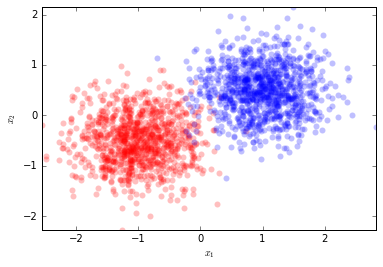

In [2]:
data_x_0 = []; data_x_1 = []
for _ in range(1000):
    data_x_0.append([np.random.normal(-1., .5), np.random.normal(-0.5, .5)])
    data_x_1.append([np.random.normal(+1., .5), np.random.normal(+0.5, .5)])
data_x_0 = np.array(data_x_0); data_x_1 = np.array(data_x_1)
data_x = np.row_stack((data_x_0, data_x_1))
data_y = np.row_stack((np.zeros((data_x_0.shape[0], 1)), np.ones((data_x_1.shape[0], 1))))
data_x, data_y = shuffle(data_x, data_y)
plt.axis((min(data_x[:,0]), max(data_x[:,0]), min(data_x[:,1]), max(data_x[:,1])))
plt.plot(data_x_0[:,0], data_x_0[:,1], 'ro', markeredgewidth=0.0, alpha=0.25)
plt.plot(data_x_1[:,0], data_x_1[:,1], 'bo', markeredgewidth=0.0, alpha=0.25)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

# Design

In [3]:
X  = tf.placeholder(tf.float32)
y  = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_uniform([2, 1], -1.0, 1.0))        
b = tf.Variable(tf.zeros([1]))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
loss = tf.reduce_mean(-y * tf.log(hypothesis) - (1-y) * tf.log(1-hypothesis))

# Trainining and visualization

The decision boundary is computed based on an equation $w_1 x_1 + w_2 x_2 + b = 0$.

iter	w1	w2	b	loss
1	0.133	-0.035	-0.000	0.637
100	1.861	0.869	-0.003	0.145
200	2.451	1.182	-0.008	0.099
300	2.827	1.380	-0.012	0.081
400	3.107	1.527	-0.016	0.071
500	3.334	1.645	-0.020	0.064
600	3.524	1.742	-0.023	0.060
700	3.690	1.827	-0.026	0.056
800	3.836	1.900	-0.028	0.054
900	3.968	1.966	-0.031	0.052
1000	4.088	2.025	-0.033	0.050


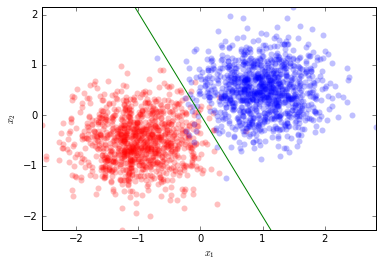

In [4]:
optimizer = tf.train.GradientDescentOptimizer(tf.Variable(0.1))
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    # Fit the NN
    sess.run(init)
    print('iter\tw1\tw2\tb\tloss')
    for i in xrange(1000):
        sess.run(train_op, feed_dict={X:data_x, y:data_y})
        if ((i+1) % 100 == 0) or i == 0:
            print '%d\t%.3f\t%.3f\t%.3f\t%.3f'%(i+1, sess.run(W)[0], sess.run(W)[1], sess.run(b)[0],
                                          sess.run(loss, feed_dict={X:data_x, y:data_y}))
    
    # Print the results
    line_x = np.array([np.min(data_x[:,0]), np.max(data_x[:,0])])
    line_y = (float(sess.run(W)[0]) * line_x + float(sess.run(b))) / -float(sess.run(W)[1])
    plt.axis((min(data_x[:,0]), max(data_x[:,0]), min(data_x[:,1]), max(data_x[:,1])))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.plot(data_x_0[:,0], data_x_0[:,1], 'ro', markeredgewidth=0.0, alpha=0.25)
    plt.plot(data_x_1[:,0], data_x_1[:,1], 'bo', markeredgewidth=0.0, alpha=0.25)
    plt.plot(line_x, line_y, 'g')
    plt.show()